In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

In [2]:
Hex135triene = """  
  C   -0.0000000    0.1921338   -3.0368170
  C   -0.0000000   -0.4370886   -1.8594235
  C    0.0000000    0.3177523   -0.5895615
  C    0.0000000   -0.3177523    0.5895615
  C   -0.0000000    0.4370886    1.8594235
  C   -0.0000000   -0.1921338    3.0368170
  H    0.0000000   -0.3814530   -3.9580663
  H    0.0000000    1.2766282   -3.0950180
  H   -0.0000000   -1.5237242   -1.8440075
  H   -0.0000000    1.4051056   -0.6177166
  H   -0.0000000   -1.4051056    0.6177166
  H   -0.0000000    1.5237242    1.8440075
  H    0.0000000   -1.2766282    3.0950180
  H    0.0000000    0.3814530    3.9580663
"""
# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Hex135triene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

[[-3.036817   0.1921338]
 [-1.8594235 -0.4370886]
 [-0.5895615  0.3177523]
 [ 0.5895615 -0.3177523]
 [ 1.8594235  0.4370886]
 [ 3.036817  -0.1921338]]


In [3]:
hex135triene_molecule = gto.M(atom=Hex135triene, basis='sto-3g')#'sto-6g''ccpvdz'
px_indices = pts.taking_indices(hex135triene_molecule, ['C 2px'])
print(px_indices)
hf = scf.RHF(hex135triene_molecule)
hf_energy = hf.kernel()

[2, 7, 12, 17, 22, 27]


converged SCF energy = -228.962806176943


In [4]:
indices_valence_orbitals = [i for i, label in enumerate(hex135triene_molecule.ao_labels()) if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
valence_orbitals = [label for label in hex135triene_molecule.ao_labels() if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
px_indices_full = [i for i, label in enumerate(valence_orbitals) if ('C 2px') in label]
print(hex135triene_molecule.ao_labels())
print(indices_valence_orbitals)
print(valence_orbitals)
print(alg_valence_orbitals)
print(px_indices_full)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
['0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 

In [5]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [6]:
n = len(indices_valence_orbitals)
print(n)
H_full = np.zeros((n,n))

for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    H_full[i, i] = -alpha 
print(H_full)

S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            H_full[i, j] = H_full[j, i] = K*S_full[i,j]*(H_full[i,i]+H_full[j,j])/2
print(H_full)

32
[[-21.4   0.    0.  ...   0.    0.    0. ]
 [  0.  -11.4   0.  ...   0.    0.    0. ]
 [  0.    0.  -11.4 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... -13.6   0.    0. ]
 [  0.    0.    0.  ...   0.  -13.6   0. ]
 [  0.    0.    0.  ...   0.    0.  -13.6]]
[[-2.14000000e+01 -0.00000000e+00  1.12232391e-15 ... -1.47733114e-03
  -1.14019118e-05 -4.85454560e-07]
 [-0.00000000e+00 -1.14000000e+01 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.12232391e-15 -0.00000000e+00 -1.14000000e+01 ... -6.14110383e-04
   5.16111979e-06 -2.82857165e-08]
 ...
 [-1.47733114e-03 -0.00000000e+00 -6.14110383e-04 ... -1.36000000e+01
  -3.76853504e-01 -1.41077506e+00]
 [-1.14019118e-05 -0.00000000e+00  5.16111979e-06 ... -3.76853504e-01
  -1.36000000e+01 -3.50326061e+00]
 [-4.85454560e-07 -0.00000000e+00 -2.82857165e-08 ... -1.41077506e+00
  -3.50326061e+00 -1.36000000e+01]]


In [7]:
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
ASA = A@S_full@A
H_p = A @ H_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_px = C[px_indices_full,:]
print(C_px.round(3))

[-28.31820256 -26.89082775 -24.70582531 -21.30134421 -19.48322801
 -18.85725073 -15.92856841 -15.75976267 -14.79465539 -14.72195681
 -14.4303951  -14.2866896  -13.91470525 -13.2720555  -13.23626519
 -12.15712161  -9.77445567  -8.14368385  -6.76024998   0.53828924
   2.94817083   4.30696251   6.15569597   6.73433487   9.36982539
   9.65407379  12.73861473  12.92421411  15.66672629  34.11599371
  36.89259637  38.16007573]
[[-0.     0.    -0.     0.     0.    -0.     0.     0.    -0.     0.
  -0.     0.    -0.265  0.     0.459  0.489  0.48   0.436  0.243 -0.
  -0.    -0.     0.     0.    -0.     0.     0.    -0.     0.    -0.
   0.    -0.   ]
 [-0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -0.     0.
  -0.     0.    -0.409  0.     0.507  0.244 -0.279 -0.522 -0.407  0.
  -0.     0.    -0.     0.     0.     0.    -0.     0.    -0.    -0.
  -0.     0.   ]
 [ 0.     0.     0.     0.    -0.    -0.    -0.     0.    -0.     0.
  -0.    -0.    -0.512  0.     0.18  -0.448 -0.438  0.191  

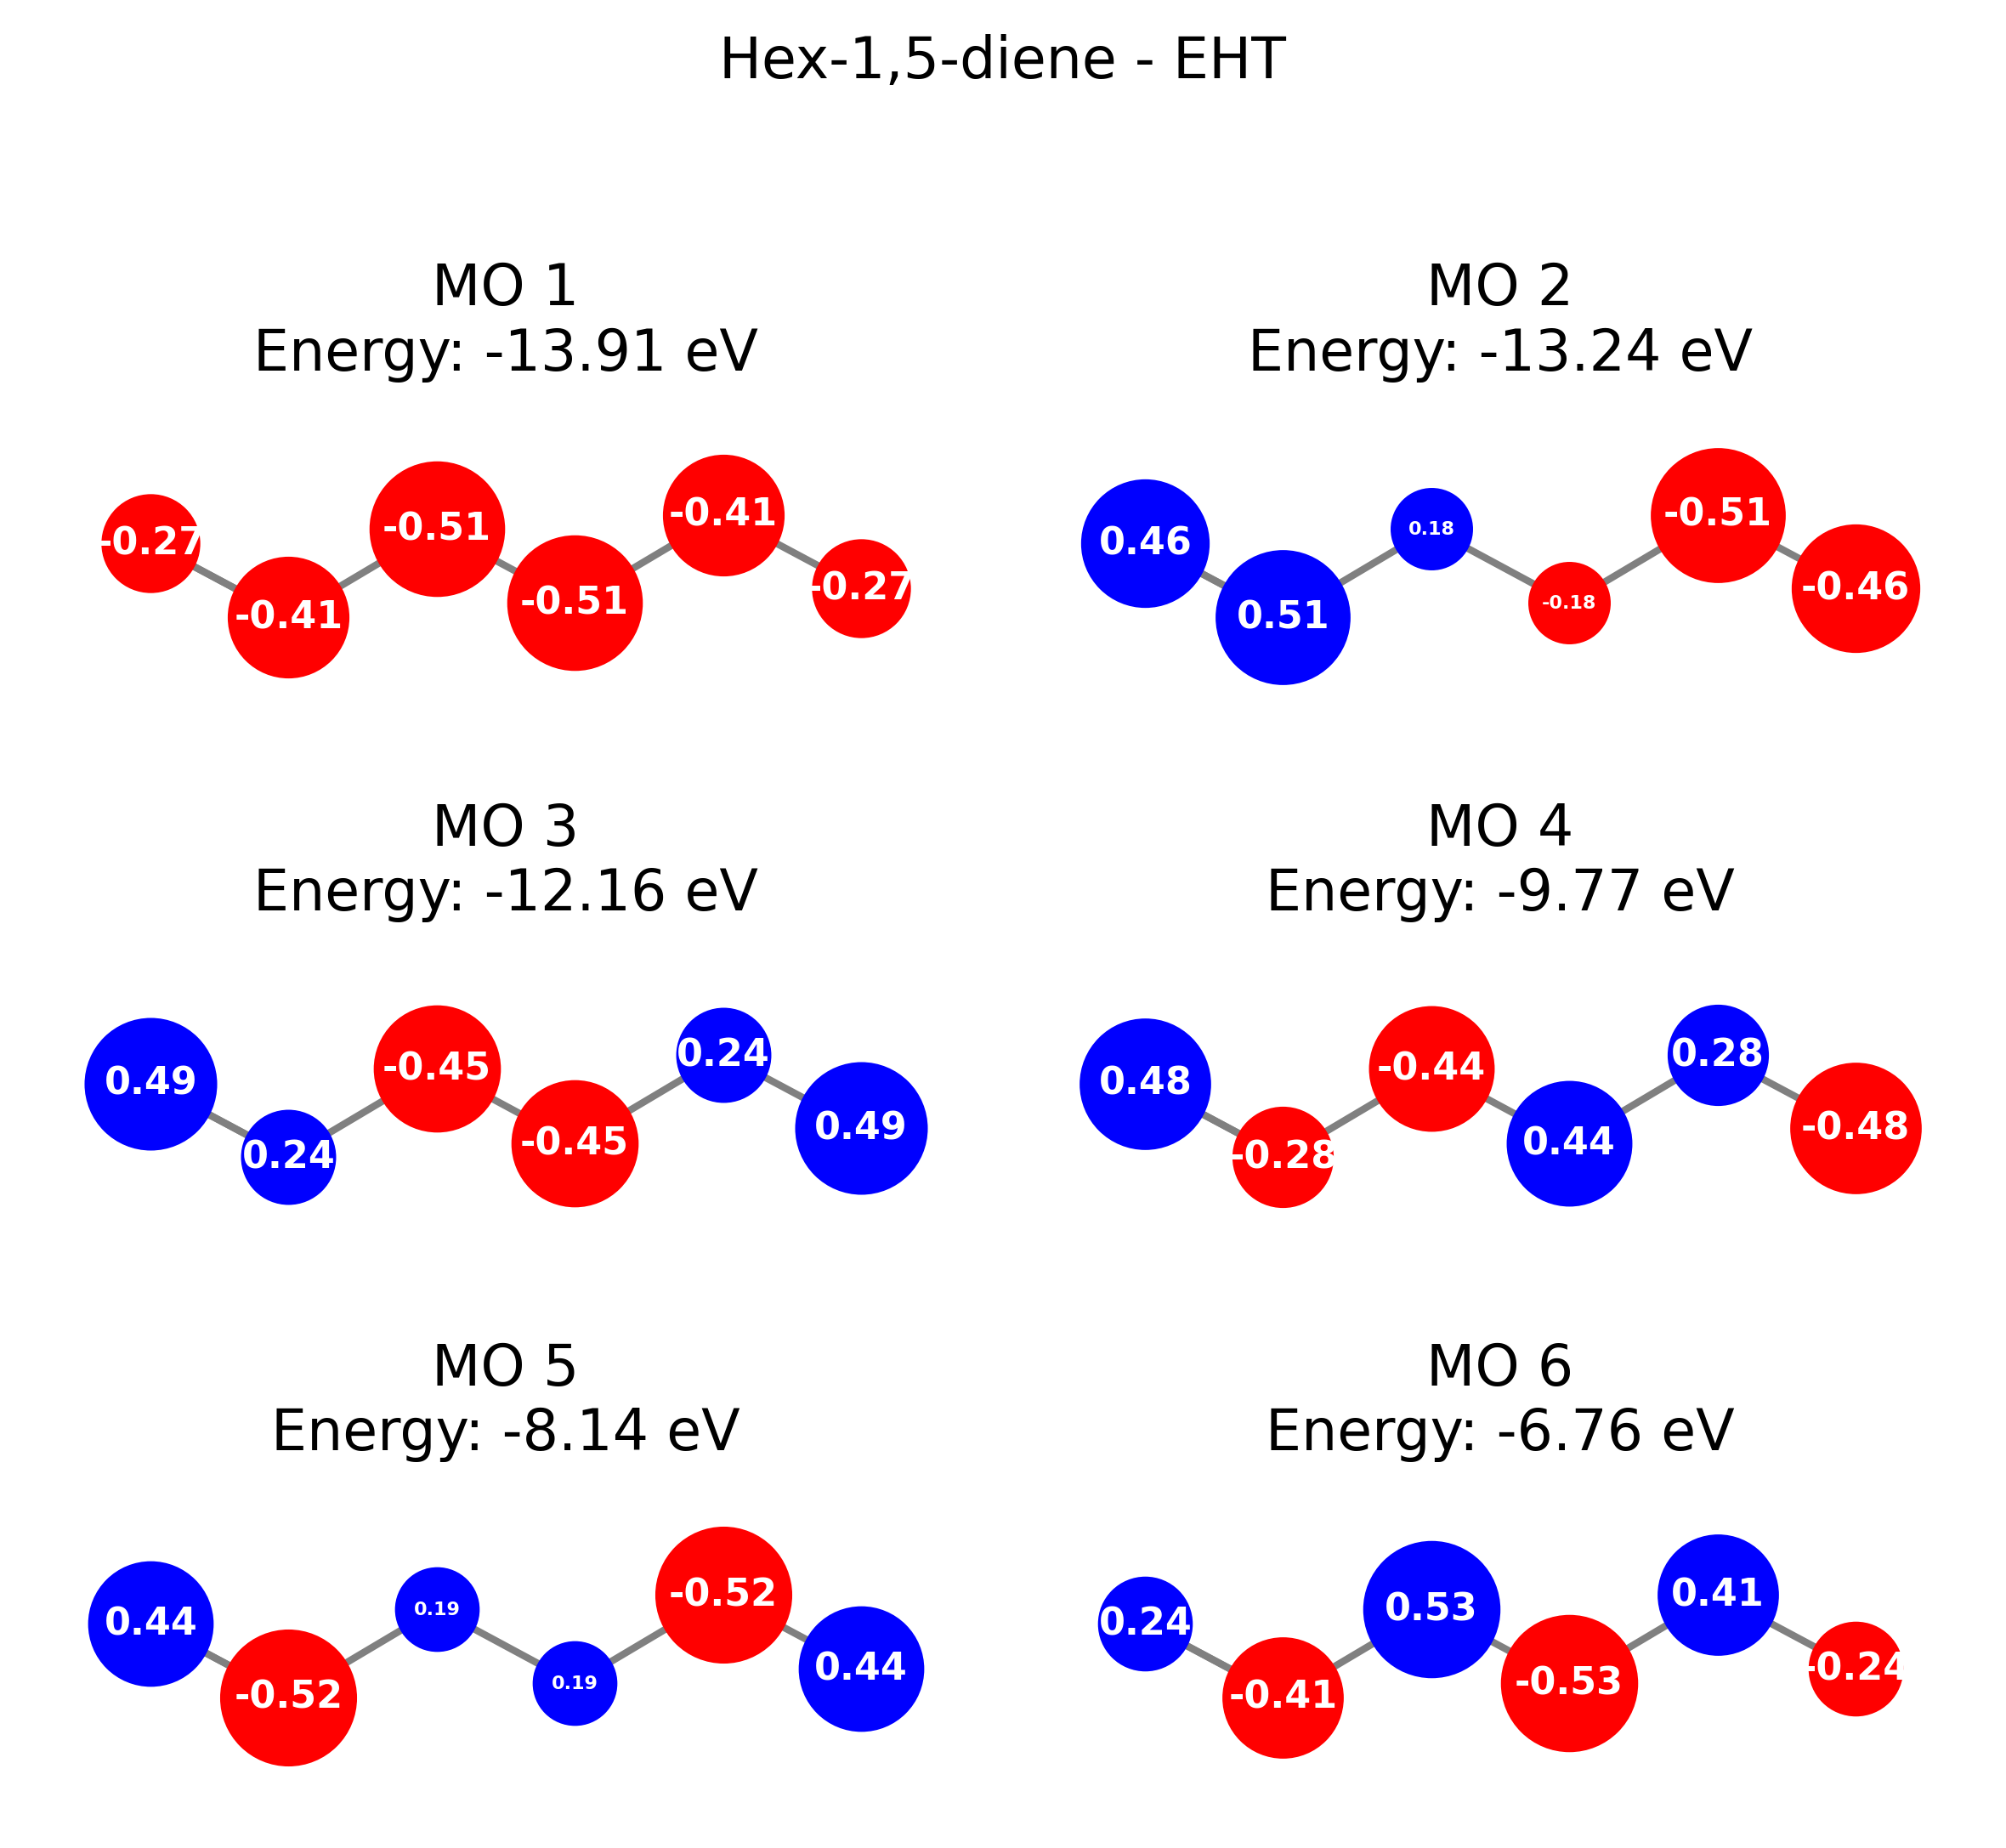

In [8]:
pts.plot_MOs(eigenvalues_full[[12,14,15,16,17,18]], C_px[:, [12,14,15,16,17,18]], coordinates, [(0,1)], 'Hex-1,5-diene', 'EHT', (6,6))

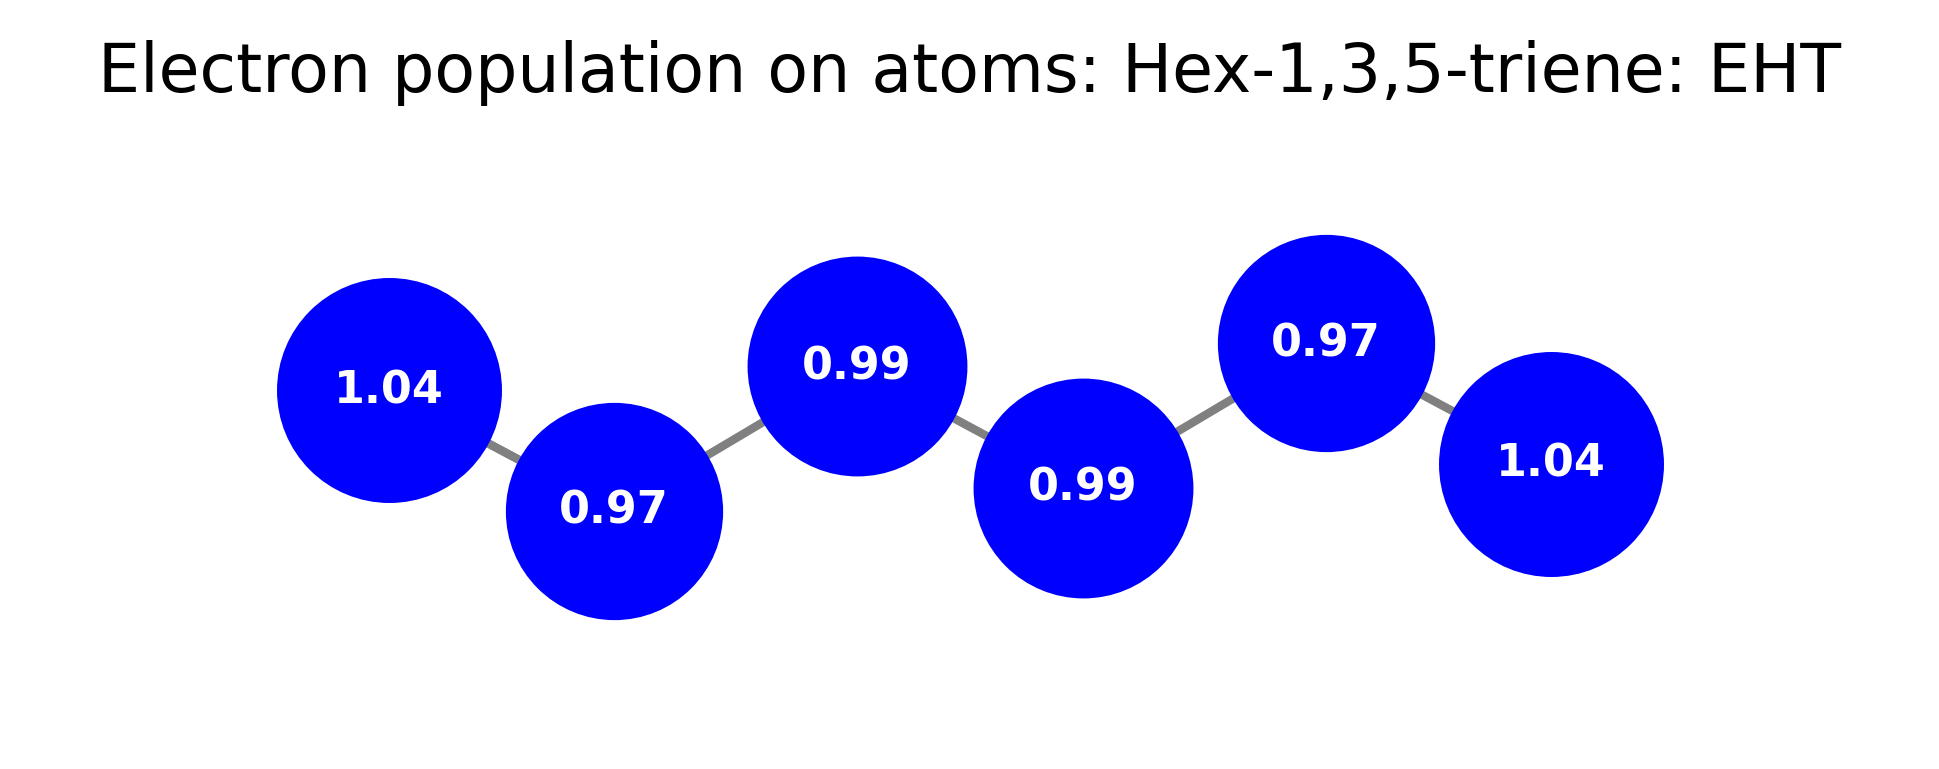

In [9]:
D_eht = pts.making_D(C_px[:, [12,14,15,16,17,18]], 6)
pts.plotting_of_D_atoms(6, coordinates, [(0,1)], D_eht, 'Hex-1,3,5-triene', 'EHT', (6,2))